In [1]:
# # 한글 워드 크라우드(Konlpy)
# !apt-get install -y fonts-nanum #> dev/null
# !fc-cache -fv #> /dev/null
# !rm -rf ~/.cache/matplot.lib #> /dev/null

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

In [3]:
# #Konlpy
# !pip install konlpy

In [4]:
from konlpy.tag import Okt, Kkma, Komoran

In [5]:
okt = Okt()
kkma = Kkma()
kr = Komoran()

In [2]:
text = '열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요.'
text

'열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요.'

In [7]:
# 한글 형태소 분석기별 차이점
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요', '.']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요', '.']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요', '.']


In [8]:
# 품사 태깅 pos(part-of-speech tagging)
# http://kkma.snu.ac.kr/documents/?doc=postag
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb'), ('.', 'Punctuation')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VXV'), ('세요', 'EFN'), ('.', 'SF')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EF'), ('.', 'SF')]


# 명사만 추출

In [9]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


# 한빛아카데미 새로나온 책 200권 tag 워드크라우드 만들기

In [10]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 

In [11]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import requests, re
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [12]:
base_url = 'https://www.hanbit.co.kr'
sub_url = '/store/books/new_book_list.html'
url = base_url + sub_url
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

In [11]:
lis = soup.select('.sub_book_list')
len(lis)

20

In [12]:
li = lis[0]
href = li.find('a')['href']
href

'/store/books/look.php?p_code=B2604168887'

In [13]:
res = requests.get(base_url + href)
book_soup = BeautifulSoup(res.text, 'html.parser')

In [14]:
tags = book_soup.select('.tag_area > a')
len(tags)

15

In [15]:
tag_list = []
for a in tags:
    tag_list.append(a.get_text().strip())
print(tag_list)

['pandas', 'NumPy', 'IPython', 'matplotlib', '판다스', '팬더스', '넘파이', '사이파이', '맷플롯립', '주피터', '주피터노트북', '데이터분석', '데이터과학', '데이터시각화', '파이썬']


In [13]:
tag_list = []
for page in tqdm(range(1, 11)):
    url = f'{base_url}{sub_url}?page={page}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    lis = soup.select('.sub_book_list')
    for li in lis:
        book_url = li.find('a')['href']
        res = requests.get(base_url + book_url)
        book_soup = BeautifulSoup(res.text, 'html.parser')
        tags = book_soup.select('.tag_area > a')
        for a in tags:
            tag_list.append(a.get_text().strip())

  0%|          | 0/10 [00:00<?, ?it/s]

In [14]:
len(tag_list)

2070

In [15]:
tag_list

['pandas',
 'NumPy',
 'IPython',
 'matplotlib',
 '판다스',
 '팬더스',
 '넘파이',
 '사이파이',
 '맷플롯립',
 '주피터',
 '주피터노트북',
 '데이터분석',
 '데이터과학',
 '데이터시각화',
 '파이썬',
 '해외여행',
 '프라하',
 '체코',
 '배낭여행',
 '도시여행',
 '가이드북',
 '지정학',
 '국제관계',
 '국제정치',
 '국제정세',
 '세계사',
 '세계정세',
 '현대세계',
 '어린이 문학',
 '그래픽노블',
 '자기계발',
 '학교 생활',
 '첫사랑',
 '우정',
 '사춘기',
 '데브옵스',
 '데브섹옵스',
 '자바',
 '스프링 부트',
 '마이크로넛',
 '쿼쿠스',
 '클라우드',
 'DevOps',
 'DevSecOps',
 'Java',
 'Spring Boot',
 'Micronaut',
 'Quarkus',
 '언어',
 '문화',
 '역사',
 '인간',
 '그림책',
 '감정',
 '책',
 '세계',
 '민족',
 '말',
 '글',
 '수어',
 '토착어',
 '유네스코',
 '일본 여행',
 '일본 소도시',
 '소도시 여행',
 '힐링 여행',
 '식도락 여행',
 '감성 여행',
 '기업 전략',
 '꼬인 문제',
 '크럭스',
 '리처드 루멜트',
 'Docs',
 'Developer',
 '문서',
 '개발자',
 '기술문서',
 '작성',
 '테크니컬 라이팅',
 '테크니컬 라이터',
 '사용자 조사',
 '글쓰기',
 'Technical writing',
 '라이팅',
 '실무 노트',
 'README',
 '튜토리얼',
 '마찰로그',
 '유령',
 '탐정',
 '추리',
 '도서관',
 '가족',
 '우정',
 '과학',
 '수학',
 '빛',
 '입자',
 '상대성이론',
 '시간',
 '공간',
 '방정식',
 '미분',
 '적분',
 '함수',
 '우주',
 '원소',
 '진화',
 '교양',
 '매트랩',
 'MATLAB

# 워드크라우드 만들기
### tag_list를 빈도 딕셔너리로 만들기

In [16]:
tag_set = set(tag_list)
len(tag_set)

1498

In [17]:
tag_dict = {}
for item in tag_set:
    tag_dict[item] = tag_list.count(item)

In [18]:
# 리스트내포 and 딕셔너리내포
tag_dict = {item : tag_list.count(item) for item in tag_set}

In [19]:
tag_dict

{'코랩': 1,
 '추리': 4,
 '맛디 포토샵': 1,
 '계획법': 1,
 '2010': 1,
 '랜섬웨어': 1,
 '기술': 1,
 '물건': 1,
 '김신애': 1,
 '평판': 1,
 '네이버 스마트스토어': 1,
 '대시보드': 1,
 '전자기파': 1,
 '전략분석': 1,
 '엑셀기능': 1,
 '리팩터링': 2,
 '신입사원': 2,
 '푸껫여행': 1,
 '플레이스테이션': 1,
 '시스템분석': 1,
 'IT교육': 1,
 '수입': 1,
 '빨강머리앤': 1,
 '시스템 설계': 1,
 '전략수립': 1,
 '인플레이션': 1,
 'AUTOCAD 2023': 1,
 '캠핑카여행': 1,
 '국제경영': 2,
 '두뇌퀴즈': 2,
 '프로세스': 2,
 '데이터래퍼': 1,
 '수어': 1,
 'C11': 1,
 '유니티 2022': 1,
 '파이썬 웹 프로그래밍': 1,
 '나는유튜버다': 1,
 'topology': 1,
 '펜글씨': 1,
 'TFLite': 1,
 '팬더스': 2,
 '세계정세': 1,
 '생초보': 1,
 '원소': 2,
 '7살수학': 2,
 '백테스팅': 1,
 'Android Studio': 1,
 '영상 편집': 2,
 '일러스트레이터 강좌': 1,
 '놀이교육': 1,
 '타입 시스템': 1,
 '전략평가': 1,
 '포토샵 CC': 1,
 '평가기': 1,
 '리처드 루멜트': 1,
 'README': 1,
 '데이터 사이언스': 5,
 '워크플로': 1,
 '힉스': 1,
 'SCM': 1,
 'React Native': 1,
 '포토샵': 3,
 '입학준비': 1,
 '공공데이터': 1,
 '객체 지향 프로그래밍': 5,
 'CRM마케팅': 1,
 '독학': 1,
 '지정학': 1,
 '서포트 벡터 머신': 1,
 'AUTOCAD 2019': 1,
 '어도비 애프터 이펙트': 1,
 '게더타운': 1,
 '두뇌계발워크북': 1,
 '대양주': 1,
 '아키텍트': 1,
 '로드 밸런싱': 1,
 

In [20]:
count = 0
for key, value in tag_dict.items():
    # print(key, ':', value)
    count += 1
    if count > 5:
        break

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [22]:
# font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'

In [23]:
wc = WordCloud(background_color='white', max_words=500).generate_from_frequencies(tag_dict)

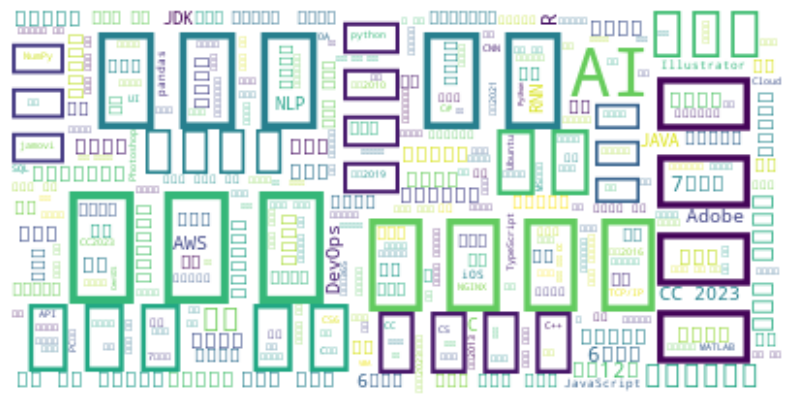

In [24]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 네이버 지식인 답글 크롤링

In [25]:
# base_url = 'https://www.hanbit.co.kr'
# sub_url = '/store/books/new_book_list.html'
# url = base_url + sub_url
url = 'https://kin.naver.com/search/list.naver?query=%EC%97%AC%EC%B9%9C%EC%84%A0%EB%AC%BC&page='
page = str(1)
driver = webdriver.Chrome()
driver.get(url+page)
time.sleep(2)
res = requests.get(url+page)
soup = BeautifulSoup(res.text, 'html.parser')

In [26]:
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="여친선물의 지식iN Q&amp;A 검색결과입니다. 궁금증을 해결하지 못했다면 지식iN '질문하기'를 해보세요." name="description">
<meta content="width=1024" name="viewport"/>
<meta content="none" name="msapplication-config">
<link href="https://ssl.pstatic.net/static.kin/static/pc/20230412134804/css/min/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20230412134804/css/min/components.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20230412134804/css/min/other.css" rel="stylesheet" type="text/css"/>
<script>
	
	var pcDomain = "kin.naver.com";
	var pcDomainWithProtocol = "https://kin.naver.com";
	var pcKinServiceProtocol = "https";

	var mobileDomain = "m.kin.naver.com";
	var mobileDomainWithProtocol = "https://m.kin.naver.com";
	var mobileKinServiceProtocol = "https";

	var uplo

In [27]:
trs = soup.select('ul.basic1 > li')
trs

[<li>
 <dl>
 <dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=5&amp;dirId=511&amp;docId=443958205&amp;qb=7Jes7Lmc7ISg66y8&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank"><b>여친선물</b> 추천좀용 ㅎㅎ</a>
 </dt>
 <dd class="txt_inline">2023.04.17.</dd>
 <dd><b>여친선물</b> 뭐가 좋을까용 ㅎㅎ 20대 초반 <b>여친선물</b>인데요 인기있는 <b>여친선물</b> 리스트 부탁드립니다!  인기있는 <b>여친선물</b> 리스트 말고 뭔가 특별한 선물이어야 하지 않을까요?... </dd>
 <dd class="tag_area">
 <a class="em _nclicks:kin.tag" href="/tag/tagDetail.naver?tag=%EC%97%AC%EC%B9%9C%EC%84%A0%EB%AC%BC&amp;listType=answer">#여친선물</a>
 <a class="_nclicks:kin.tag" href="/tag/tagDetail.naver?tag=%EC%97%AC%EC%B9%9C%EC%83%9D%EC%9D%BC%EC%84%A0%EB%AC%BC%EC%B6%94%EC%B2%9C&amp;listType=answer">#여친생일선물추천</a>
 <a class="_nclicks:kin.tag" href="/tag/tagDetail.naver?tag=%EC%97%AC%EC%9E%90%EC%B9%9C%EA%B5%AC%EC%83%9D%EC%9D%BC%EC%84%A0%EB%AC%BC%EC%B6%94%EC%B2%9C&amp;listType=answer">#여자친구생일선물추천</a>
 <a class="_nclicks:kin.ta

In [28]:
tr = trs[0]
tr

<li>
<dl>
<dt>
<a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=5&amp;dirId=511&amp;docId=443958205&amp;qb=7Jes7Lmc7ISg66y8&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank"><b>여친선물</b> 추천좀용 ㅎㅎ</a>
</dt>
<dd class="txt_inline">2023.04.17.</dd>
<dd><b>여친선물</b> 뭐가 좋을까용 ㅎㅎ 20대 초반 <b>여친선물</b>인데요 인기있는 <b>여친선물</b> 리스트 부탁드립니다!  인기있는 <b>여친선물</b> 리스트 말고 뭔가 특별한 선물이어야 하지 않을까요?... </dd>
<dd class="tag_area">
<a class="em _nclicks:kin.tag" href="/tag/tagDetail.naver?tag=%EC%97%AC%EC%B9%9C%EC%84%A0%EB%AC%BC&amp;listType=answer">#여친선물</a>
<a class="_nclicks:kin.tag" href="/tag/tagDetail.naver?tag=%EC%97%AC%EC%B9%9C%EC%83%9D%EC%9D%BC%EC%84%A0%EB%AC%BC%EC%B6%94%EC%B2%9C&amp;listType=answer">#여친생일선물추천</a>
<a class="_nclicks:kin.tag" href="/tag/tagDetail.naver?tag=%EC%97%AC%EC%9E%90%EC%B9%9C%EA%B5%AC%EC%83%9D%EC%9D%BC%EC%84%A0%EB%AC%BC%EC%B6%94%EC%B2%9C&amp;listType=answer">#여자친구생일선물추천</a>
<a class="_nclicks:kin.tag" href="/ta

In [29]:
href = tr.find('a')['href']
href

'https://kin.naver.com/qna/detail.naver?d1id=5&dirId=511&docId=443958205&qb=7Jes7Lmc7ISg66y8&enc=utf8§ion=kin&rank=1&search_sort=0&spq=0'

In [30]:
driver.get(href)
time.sleep(2)

In [187]:
res = requests.get(href)
sub_trs = BeautifulSoup(res.text, 'html.parser')
sub_trs


<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="width=1024" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="none" name="msapplication-config">
<meta content="index,nofollow" name="robots">
<meta content="여친선물 추천좀용 ㅎㅎ" property="og:title">
<meta content="https://kin.naver.com/qna/detail.nhn?d1id=5&amp;dirId=511&amp;docId=443958205&amp;qb=7Jes7Lmc7ISg66y8&amp;enc=utf8%C2%A7ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" property="og:url">
<meta content="https://ssl.pstatic.net/static/kin/common/kin_thumbnail_new_w1000.png" property="og:image"/>
<meta content="여친선물 뭐가 좋을까용 ㅎㅎ 20대 초반 여친선물인데요인기있는 여친선물 리스트 부탁드립니다!" property="og:description"/>
<meta content="네이버 지식iN" property="og:article:author"/>
<meta content="https://kin.naver.com" property="og:article:author:url"/>
<title>
		여친선물 추천좀용 ㅎㅎ : 지식iN
	</title>
<link href="/favicon.ico?v

In [188]:
# 답글 갯수
ans_num = int(sub_trs.select_one('._answerCount.num').get_text())
ans_num

8

In [189]:
# 답글 가져오기
sub_tr = sub_trs.select('.answer-content__item._contentWrap._answer')
sub_t = sub_tr[0]
sub_t

<div class="answer-content__item _contentWrap _answer" id="answer_8">
<!-- [D] 채택
* 질문자, 지식인&질문자 채택 : 'adoptCheck'
* 지식인 채택 : 'adoptCheck adoptCheck--kin'
-->
<div class="adoptCheck">
<div class="checkText">
<span>질문자</span> 채택
			</div>
</div>
<a href="#answer8" name="answer8"><span class="blind">8번째 답변</span></a>
<div class="profile_card">
<div class="card_inner">
<div class="card_info">
<div class="profile_info">
<div class="name_area">
<strong class="etc_text">비공개 답변</strong>
</div>
<div class="item_area">
<div class="item_list">
<span class="item">비공개율 62%</span><span class="item">최근답변 2023.04.20.</span>
</div>
<div class="badge_list">
<span class="badge level8">지존</span>
</div>
</div>
</div>
<div class="thumbnail_area">
<div class="thumbnail">
<img alt="프로필 사진" src="https://ssl.pstatic.net/static/kin/09renewal/avatar/200x200_m_gray/answer_blue.png"/>
</div>
</div>
</div>
</div>
</div>
<div class="_endContents _hashtagHighlightingContents c-heading-answer__content" data-tag="%EC%9

In [190]:
sub_ans = sub_t.select('.se-module.se-module-text > p > span')
sub_ans

[<span class="se-fs- se-ff-" id="SE-e1ffdfb1-66f1-471d-9d8c-470bbbc2efbc" style="">여친선물로</span>,
 <span class="se-fs- se-ff-" id="SE-b21e14ff-1dfc-4ff7-b419-7b312724e195" style="">​</span>,
 <span class="se-fs- se-ff-" id="SE-3a9f5ae8-9a89-419d-9256-30e3ebfe8273" style="">데일리로맨틱 오르골 무드등 강추요</span>,
 <span class="se-fs- se-ff-" id="SE-4f29d1e9-3a04-429e-b36e-2a80dc8e3d63" style="">​</span>,
 <span class="se-fs- se-ff-" id="SE-7604d226-8a0d-4a30-8904-0270b51d2ddf" style="">여친선물 BEST입니다~^^ 후기봐보세요</span>,
 <span class="se-fs- se-ff-" id="SE-615210db-d1c1-4d29-a239-d0117b074c45" style="">​</span>,
 <span class="se-fs- se-ff-" id="SE-3544aac5-de8f-445f-9fe1-9a545966958f" style="">​</span>]

In [191]:
answer_list = []
remove_set = {u"\u200b"}
for a in sub_ans:
    answer_list.append(a.get_text().strip())
    answer_list = [i for i in answer_list if i not in remove_set]
print(answer_list)

['여친선물로', '데일리로맨틱 오르골 무드등 강추요', '여친선물 BEST입니다~^^ 후기봐보세요']


In [192]:
for i in range(int(ans_num/5)):
    driver.find_element(By.XPATH, '//*[@id="nextPageButton"]').click()

In [198]:
# 한 페이지 5개 답글 가져오기

answer_list = []
remove_set = {u"\u200b"}

for a in sub_tr:
    for a in sub_ans:
        answer_list.append(a.get_text().strip())
        answer_list = [i for i in answer_list if i not in remove_set]
print(answer_list)

['여친선물로', '데일리로맨틱 오르골 무드등 강추요', '여친선물 BEST입니다~^^ 후기봐보세요', '여친선물로', '데일리로맨틱 오르골 무드등 강추요', '여친선물 BEST입니다~^^ 후기봐보세요', '여친선물로', '데일리로맨틱 오르골 무드등 강추요', '여친선물 BEST입니다~^^ 후기봐보세요', '여친선물로', '데일리로맨틱 오르골 무드등 강추요', '여친선물 BEST입니다~^^ 후기봐보세요', '여친선물로', '데일리로맨틱 오르골 무드등 강추요', '여친선물 BEST입니다~^^ 후기봐보세요']


In [ ]:
answer_list = []
remove_set = {u"\u200b"}


# 강사님

In [31]:
from urllib.parse import quote

In [32]:
base_url = 'https://kin.naver.com/search/list.naver?query='
url = base_url + quote('여친선물')
driver.get(url)

In [33]:
answer_list = []
for page in range(1, 11):
    print('page', page)
    url = f'{base_url}{quote("여친선물")}&page={page}'
    driver.get(url)
    time.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    lis = soup.select('ul.basic1 > li')

    for li in lis:
        sub_url = li.select_one('a._searchListTitleAnchor')['href']
        driver.get(sub_url)
        time.sleep(1)

        count = int(driver.find_element(By.CSS_SELECTOR, '._answerCount.num').text)
        answer_page = (count-1) // 5
        print(count, answer_page)
        for i in range(answer_page):
            driver.find_element(By.ID, 'nextPageButton').click()
            time.sleep(1)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        divs = soup.select('div.answer-content__item._contentWrap._answer')
        print(len(divs))
        for div in divs:
            ps = div.select('p.se-text-paragraph')
            for p in ps:
                text = p.get_text()
                if text == ' ' or text == '\u200b':
                    continue
                answer_list.append(text)
            driver.back()
            time.sleep(1)

page 1
8 1
8
5 0
5
8 1
8
4 0
4
10 1
10
12 2
12
1 0
1
5 0
5
6 1
6
1 0
1
page 2
12 2
12
11 2
11
5 0
5
13 2
13
12 2
12
6 1
6
1 0
1
9 1
9
14 2
14
1 0
1
page 3
14 2
14
5 0
5
2 0
2
1 0
1
8 1
8
9 1
9
2 0
2
5 0
5
1 0
1
3 0
3
page 4
3 0
3
1 0
1
5 0
5
4 0
4
4 0
4
9 1
9
18 3
18
1 0
1
2 0
2
4 0
4
page 5
1 0
1
2 0
2
5 0
5
8 1
8
14 2
14
4 0
4
13 2
13
13 2
13
15 2
15
20 3
20
page 6
12 2
12
3 0
3
2 0
2
1 0
1
7 1
7
13 2
13
11 2
11
6 1
6
5 0
5
13 2
13
page 7
11 2
11
3 0
3
8 1
8
12 2
12
2 0
2
10 1
10
1 0
1
11 2
11
2 0
2
5 0
5
page 8
6 1
6
5 0
5
7 1
7
3 0
3
8 1
8
15 2
15
11 2
11
1 0
1
3 0
3
6 1
6
page 9
2 0
2
16 3
16
1 0
1
16 3
16
1 0
1
9 1
9
1 0
1
2 0
2
7 1
7
5 0
5
page 10
7 1
7
1 0
1
1 0
1
4 0
4
1 0
1
8 1
8
21 4
21
3 0
3
26 5
26
9 1
9


In [ ]:
with open('gf_girt.txt', 'w', encoding='utf-8') as f:
    for answer in answer_list:
        f.write(answer + '\n')

In [36]:
with open('./data/gf_gift.txt', encoding='utf-8') as file:
    text = file.read()

In [37]:
text

'여친선물로\n데일리로맨틱 오르골 무드등 강추요\n여친선물 BEST입니다~^^ 후기봐보세요\n먼저 여친의 생일을 축하합니다!\n20대 초반 여친 생일선물 추천드립니다.\n20대 여성분들 많이 꾸미는 시기이기에 향수, 립스틱, 의류, 목걸이 등이 좋을 것 같구요.\n선물의 끝은 "감동"이므로 손편지와 작은 꽃다발 함께 하면 더 좋을 것 같습니다. \n다시 한 번 축하합니다. :)\n인기있는 여친선물 리스트 말고\n뭔가 특별한 선물이어야 하지 않을까요?\n정성스런 손편지가 1번입니다.\n손편지를 써서 드리셔야 다른 선물이 빛을 발할수 있습니다~\n그리고\n나없을때도 내생각하라는 말과 함께\n대형인형 추천드려요~\n껴안고 잘 수도 있고, 침실인테리어로도 쓸수있고요~\n마지막으로\n이건 좀더 사랑을 담아 고백하는 의미로\n드릴때 쓰는거긴 한데\n사귄지 얼마 안되셨으면 써도 좋고\n기념일에 사용하셔도 좋습니다~\n20대 초반 여자친구 선물로\n사랑 문답, 펜디 카드지갑, 꽃다발 추천드려요!!\n카드지갑이랑 꽃다발 주면서\n사랑 문답까지 작성해서 같이 선물로 주면\n여자친구분 감동 받습니다\n한번 참고라도 해보시고 결정해 보세여\nhttps://link.coupang.com/a/Vhl2F\nhttps://link.coupang.com/a/Vhl6O\nhttps://link.coupang.com/a/Vhme2\n파트너스 활동의 일환으로 이에 따른 일정액의 수수료를 받을 수 있습니다.\n여자친구 선물 고민중이시면 목걸이 완전 추천해요!\n오랫동안 간직할수도 있고 여자친구가 직접 끼고 다닐수도 있으니까 더 특별한 선물이될거예요! \nhttps://smartstore.naver.com/fossette43/products/5792689156\nhttps://smartstore.naver.com/fossette43/products/6593602515\nhttps://smartstore.naver.com/fossette43/products/7339358460\n안녕하세요! 공연기획사

In [38]:
# 한글 형태소 분석기
from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()

In [39]:
# 명사만 추출
tokens = okt.nouns(text)

In [40]:
tokens[:30]

['여친',
 '선물',
 '데',
 '일리',
 '로맨틱',
 '골',
 '무드등',
 '강추',
 '여친',
 '선물',
 '후기',
 '먼저',
 '여친',
 '생일',
 '축하',
 '초반',
 '여친',
 '생일',
 '선물',
 '추천',
 '여성',
 '이기',
 '향수',
 '립스틱',
 '의류',
 '목걸이',
 '등',
 '것',
 '선물',
 '끝']

In [41]:
# 영문자, 숫자, 부호 제거
import re
tokens = [re.sub('[^가-힣]', '', token) for token in tokens]

In [42]:
import  nltk

In [43]:
nltk.download('punkt') # colab에서는 매번 다운 / 로컨에서는 한번만

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumBarunGothic' not found.
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumBarunGothic' not found.
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: U

c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54036 (\N{HANGUL SYLLABLE PAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52236 (\N{HANGUL SYLLABLE JJI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: Us

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

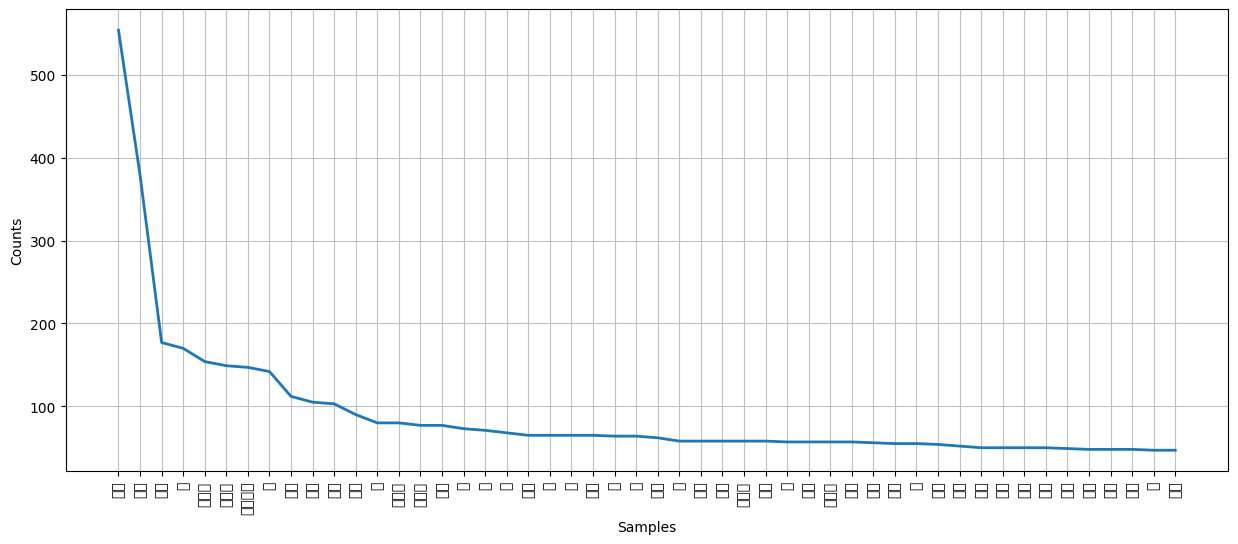

In [44]:
gift = nltk.Text(tokens, name = '여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [45]:
stoptext = '''
선물 추천 제품 수 여자친구 것 후기 가격 스 수수료 파트너 활동 저 향 이
여친 준 개 가능 요 제공 제 여자 디자인 상품 때 생각 브랜드 확인 참고 여성
분 제작 커플 인기 구매 채택 배송 도움 의미 링크 하트 더 정액
거 가지 답변 한번 통해 가성 고급 고민 비 생일 마감 등 네이버 가요 세트
용 중 사용 핸드 위 정도 요즘 날 변경 하나 부담 사이트 그냥 쿠팡 직접 질문
정말 남자 조금 아래 노블 판매 감동 인테리어 여기 남여 무광 주문 케이스
이니셜 처리 다른 사람 가장 혹시 각인 유광 일환 시 무난 아이템 구성 할인 마음
심플 포장 순 바로
'''

In [46]:
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

In [47]:
from wordcloud import WordCloud
from PIL import Image

In [48]:
data = gift.vocab().most_common(300)
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [50]:
wc = WordCloud(background_color = 'white',
               relative_scaling=0.2, min_font_size=1,
               max_font_size=120).generate_from_frequencies(dict(data))

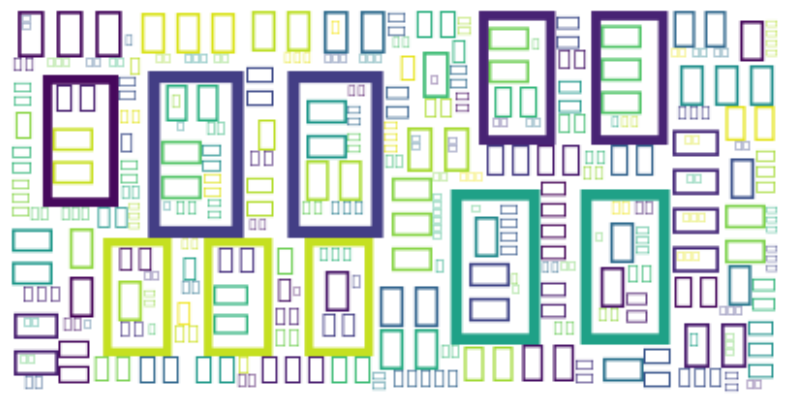

In [51]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()